In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
# confused on the amount of zeros

df = pd.read_csv('Toyota_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(10)

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
Date,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,103.12,18100000,0,0,1,0,0
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0
1980-03-24,2.371490,3.398259,3.451775,3.398259,0.000000,2803,17.92,-2.19,6567.25,9.00,99.28,21794444,0,0,0,0,1
1980-03-25,2.352816,3.371501,3.425017,3.371501,0.000000,27095,17.72,-2.09,6531.26,9.00,99.19,24327778,1,0,0,0,0
1980-03-26,2.352816,3.371501,3.425017,3.371501,0.000000,1869,18.96,-2.23,6535.88,9.00,98.68,20761111,0,1,0,0,0
1980-03-27,2.324807,3.331364,3.384880,3.331364,0.000000,14015,19.04,-2.14,6481.02,9.00,98.22,35377778,0,0,1,0,0


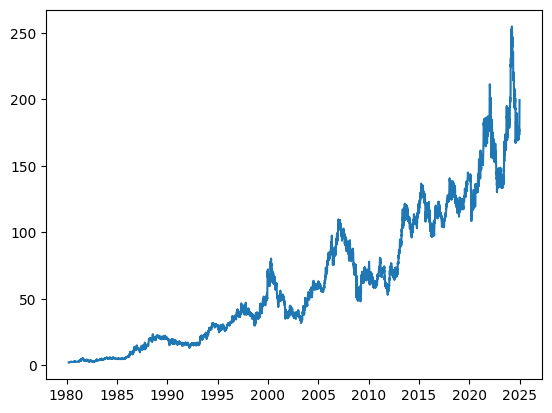

In [396]:
plt.plot(df['Adj Close'])
plt.show()

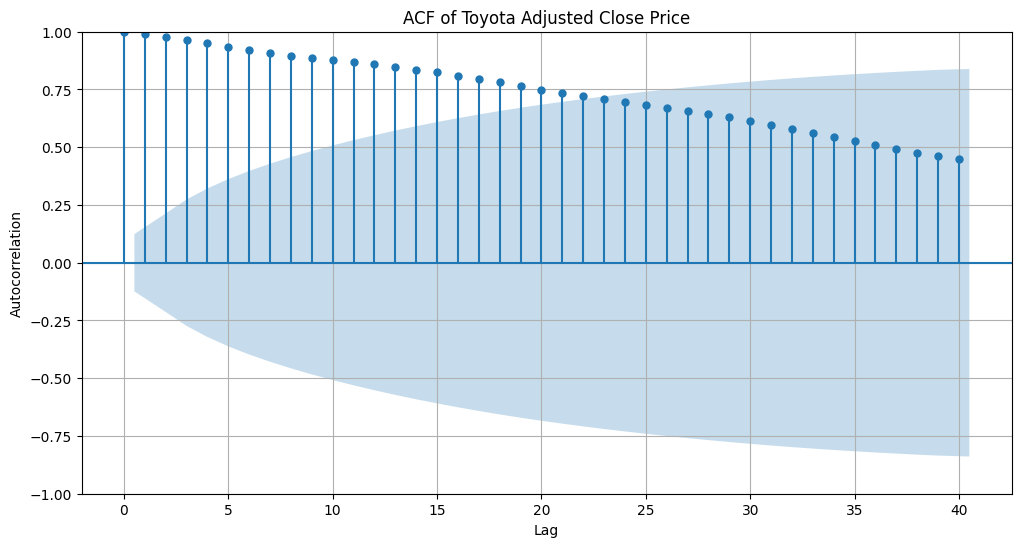

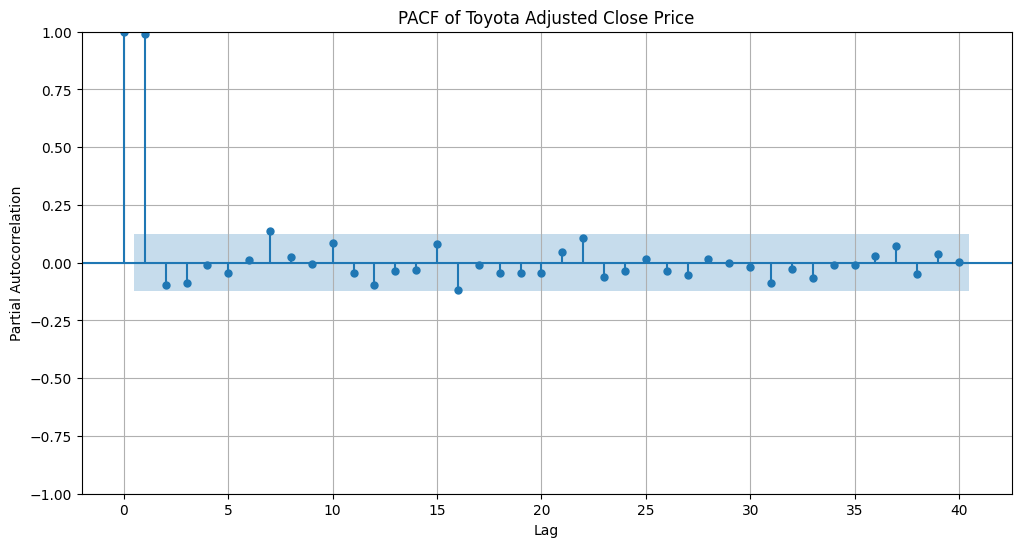

In [397]:
# acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


start_date = '2024-01-01'
end_date = '2024-12-31'
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

filtered_toyota_adj_close = filtered_df['Adj Close'].dropna()
toyota_adj_close = df['Adj Close'].dropna()

### ACF ###
plt.figure(figsize=(12, 6))
plot_acf(filtered_toyota_adj_close, lags=40, ax=plt.gca()) 
plt.title('ACF of Toyota Adjusted Close Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### PACF ###
plt.figure(figsize=(12, 6))
plot_pacf(filtered_toyota_adj_close, lags=40, ax=plt.gca())
plt.title('PACF of Toyota Adjusted Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [398]:
# Confirming data as it is on Yahoo Finance, still unsure about the amount of 0s here

import yfinance as yf

ticker = yf.Ticker("TM")
historical_data = ticker.history(period="max")

test = pd.DataFrame(historical_data)
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,1.879043,1.848978,1.848978,41109,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,1.886559,1.856495,1.856495,9343,0.0,0.0
1980-03-19 00:00:00-05:00,1.856495,1.856495,1.856495,1.856495,0,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,1.886559,1.856495,1.856495,10277,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,1.931656,1.901592,1.901592,8409,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-11 00:00:00-04:00,167.440002,170.000000,165.860001,169.419998,486800,0.0,0.0
2025-04-14 00:00:00-04:00,169.110001,173.070007,168.929993,172.000000,423600,0.0,0.0
2025-04-15 00:00:00-04:00,174.550003,176.500000,173.940002,174.240005,427800,0.0,0.0


In [399]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
count,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000,10745.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000
mean,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05,4.391936,0.902177,17489.550511,1.687379,1365.554280,1.103008e+09,0.189000,0.205031,0.204942,0.201222,0.199717
std,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05,3.919802,0.910934,7602.248403,2.149653,1266.188038,1.066588e+09,0.391526,0.403742,0.403677,0.400932,0.399805
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00,0.040000,-2.410000,6475.930000,0.100000,98.220000,8.327778e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04,0.990000,0.190000,10949.090000,0.300000,376.780000,1.071028e+08,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04,4.330000,0.840000,16755.320000,0.500000,1115.050000,7.221111e+08,0.000000,0.000000,0.000000,0.000000,0.000000
75%,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05,6.220000,1.540000,21584.500000,2.500000,1709.790000,2.007832e+09,0.000000,0.000000,0.000000,0.000000,0.000000
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07,22.360000,2.910000,42224.020000,9.000000,6090.270000,6.423401e+09,1.000000,1.000000,1.000000,1.000000,1.000000


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11291 entries, 1980-03-17 to 2024-12-27
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Adj Close                       11291 non-null  float64
 1   Close                           11291 non-null  float64
 2   High                            11291 non-null  float64
 3   Low                             11291 non-null  float64
 4   Open                            11291 non-null  float64
 5   Volume                          11291 non-null  int64  
 6   fed_funds_effective_rate        11291 non-null  float64
 7   T10Y2Y                          11291 non-null  float64
 8   nikkei225_close_in_yen          10745 non-null  float64
 9   japan_basic_discount_loan_rate  11291 non-null  float64
 10  sp500_close                     11291 non-null  float64
 11  sp500_volume                    11291 non-null  int64  
 12  monday_flag    

In [401]:
corrplot = df.corr()
corrplot

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
Adj Close,1.000000,0.991369,0.991281,0.991450,0.979054,0.281017,-0.577470,-0.110054,0.457214,-0.642685,0.955161,0.782419,-0.004693,0.001346,0.000299,0.001538,0.001653
Close,0.991369,1.000000,0.999953,0.999953,0.991121,0.301755,-0.606115,-0.094482,0.431878,-0.702880,0.930072,0.781262,-0.004929,0.001277,0.000410,0.001642,0.001774
High,0.991281,0.999953,1.000000,0.999924,0.991119,0.303710,-0.606315,-0.094085,0.431633,-0.702781,0.930011,0.782820,-0.005012,0.001502,0.000509,0.001487,0.001684
Low,0.991450,0.999953,0.999924,1.000000,0.991014,0.299151,-0.605573,-0.095354,0.433252,-0.702389,0.930271,0.779561,-0.004958,0.001150,0.000318,0.001652,0.002013
Open,0.979054,0.991121,0.991119,0.991014,1.000000,0.312267,-0.623503,-0.070743,0.340002,-0.729156,0.917007,0.788213,-0.004799,0.001321,0.000437,0.001526,0.001664
Volume,0.281017,0.301755,0.303710,0.299151,0.312267,1.000000,-0.369597,0.274240,-0.130657,-0.302085,0.186159,0.547126,-0.002490,0.022071,0.009234,-0.009502,-0.019546
fed_funds_effective_rate,-0.577470,-0.606115,-0.606315,-0.605573,-0.623503,-0.369597,1.000000,-0.593314,-0.049683,0.786693,-0.475584,-0.662691,0.001181,-0.001199,0.002331,-0.004504,0.001518
T10Y2Y,-0.110054,-0.094482,-0.094085,-0.095354,-0.070743,0.274240,-0.593314,1.000000,-0.375384,-0.186196,-0.200800,0.173150,0.004653,0.004070,0.003074,0.003809,-0.014825
nikkei225_close_in_yen,0.457214,0.431878,0.431633,0.433252,0.340002,-0.130657,-0.049683,-0.375384,1.000000,-0.147293,0.527224,0.106222,0.000219,0.000913,0.000762,-0.001070,-0.000512
japan_basic_discount_loan_rate,-0.642685,-0.702880,-0.702781,-0.702389,-0.729156,-0.302085,0.786693,-0.186196,-0.147293,1.000000,-0.561858,-0.609803,0.004881,-0.001065,-0.000811,-0.001149,-0.002308


In [402]:
df['TargetNextClose'] = df['Adj Close'].shift(1)
df.head()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag,TargetNextClose
Date,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0,2.296798
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0,2.306134
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,103.12,18100000,0,0,1,0,0,2.306134
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0,2.306134


In [403]:
# Creating 7 day moving average of adj_close to capture short term trend
df['MA_5_adj_close'] = df['Adj Close'].rolling(window=5).mean() 

# creating 7 day moving average of standard deviation of adj_close
df['5_day_SD'] = df['Adj Close'].rolling(window=5).std()


# Adding in Technical indicators RSI, MACD, and Bollinger bands
import pandas_ta as ta
# RSI
df['RSI'] = ta.rsi(df['Adj Close'], length=5)
# MACD: This will be 2 columns, one is the MACD(diff of fast and slow EMA)
# and the other is the signal line (the EMA of the MACD line)
macd = ta.macd(df['Adj Close'], fast=5, slow=15, signal=7)
df['MACD'] = macd['MACD_5_15_7']        # MACD line
df['Signal_Line'] = macd['MACDs_5_15_7']  # Signal line
# Bollinger Bands: Creates 3 lines, lower, middle and upper bands
# Middle band is 7 day SMA of adj_close and the upper/lower bands is middle +- 2*SD
bollinger = ta.bbands(df['Adj Close'], length=7)
df['BB_Upper'] = bollinger['BBU_7_2.0']  # Upper Band
df['BB_Middle'] = bollinger['BBM_7_2.0'] # Middle Band
df['BB_Lower'] = bollinger['BBL_7_2.0']  # Lower Band



df.head()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,...,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,...,0,2.296798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,...,0,2.306134,2.315471,0.026408,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,...,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
count,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000,10745.000000,11291.000000,...,11291.000000,11290.000000,11287.000000,11287.000000,11286.000000,11277.000000,11271.000000,11285.000000,11285.000000,11285.000000
mean,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05,4.391936,0.902177,17489.550511,1.687379,...,0.199717,63.574235,63.574142,0.829098,51.456234,0.078094,0.077179,65.366448,63.569066,61.771683
std,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05,3.919802,0.910934,7602.248403,2.149653,...,0.399805,52.258880,52.234423,0.940699,20.216643,1.317484,1.163843,53.620608,52.218764,50.855936
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00,0.040000,-2.410000,6475.930000,0.100000,...,0.000000,2.259452,2.263186,0.000000,0.477904,-11.827289,-9.642728,2.327022,2.278124,2.207512
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04,0.990000,0.190000,10949.090000,0.300000,...,0.000000,19.224636,19.238147,0.210966,36.741927,-0.325034,-0.276745,19.935362,19.236310,18.692491
50%,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04,4.330000,0.840000,16755.320000,0.500000,...,0.000000,50.580730,50.658812,0.552241,51.120290,0.025614,0.023475,52.366769,50.666067,48.744917
75%,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05,6.220000,1.540000,21584.500000,2.500000,...,0.000000,104.679998,104.680123,1.103169,66.310517,0.465295,0.416223,107.072062,104.687883,101.891571
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07,22.360000,2.910000,42224.020000,9.000000,...,1.000000,254.770004,252.945999,11.518466,100.000000,11.037407,9.239317,260.549956,251.847142,247.131844


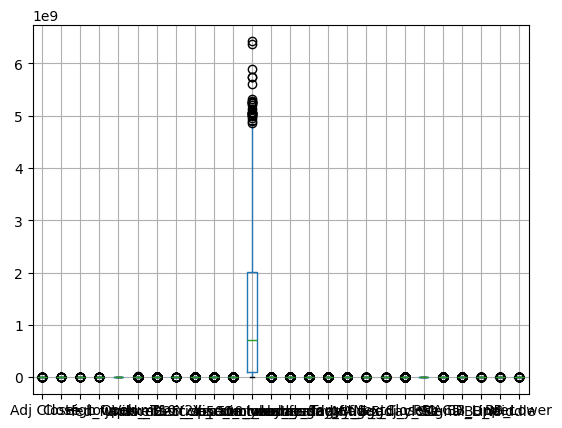

In [405]:
df.boxplot()
plt.show()

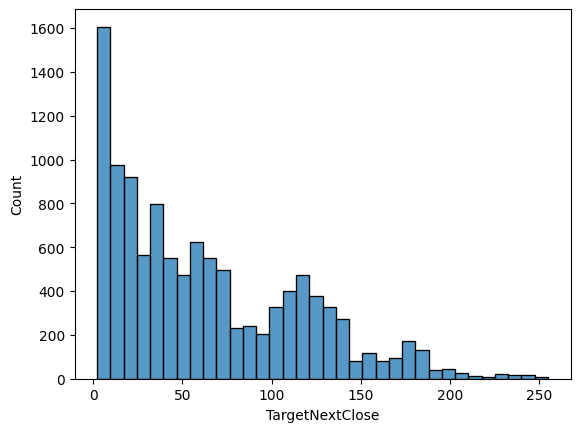

In [406]:
sns.histplot(df['TargetNextClose'])
plt.show()

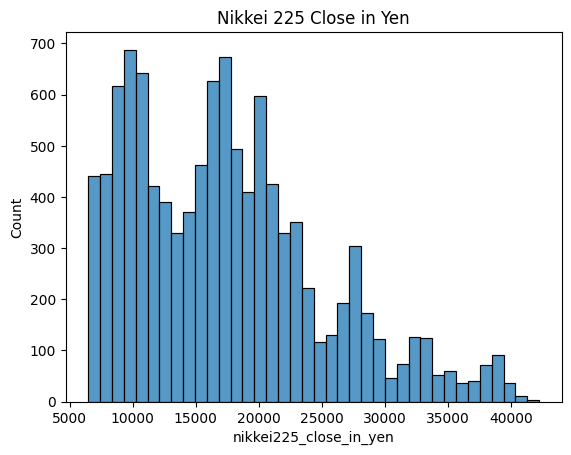

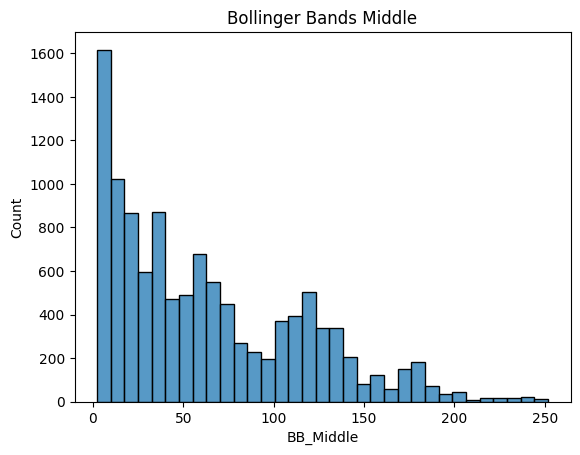

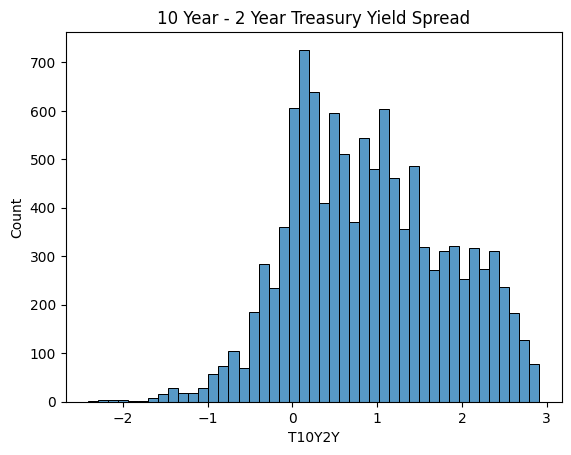

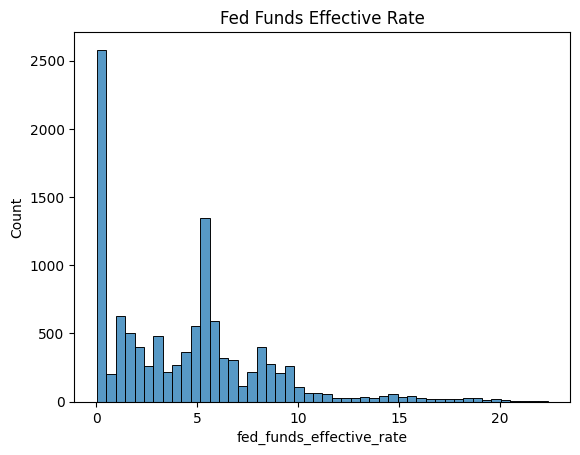

In [407]:
sns.histplot(df['nikkei225_close_in_yen'])
plt.title('Nikkei 225 Close in Yen')
plt.show()
sns.histplot(df['BB_Middle'])
plt.title('Bollinger Bands Middle')
plt.show()
sns.histplot(df['T10Y2Y'])
plt.title('10 Year - 2 Year Treasury Yield Spread')
plt.show()
sns.histplot(df['fed_funds_effective_rate'])
plt.title('Fed Funds Effective Rate')
plt.show()

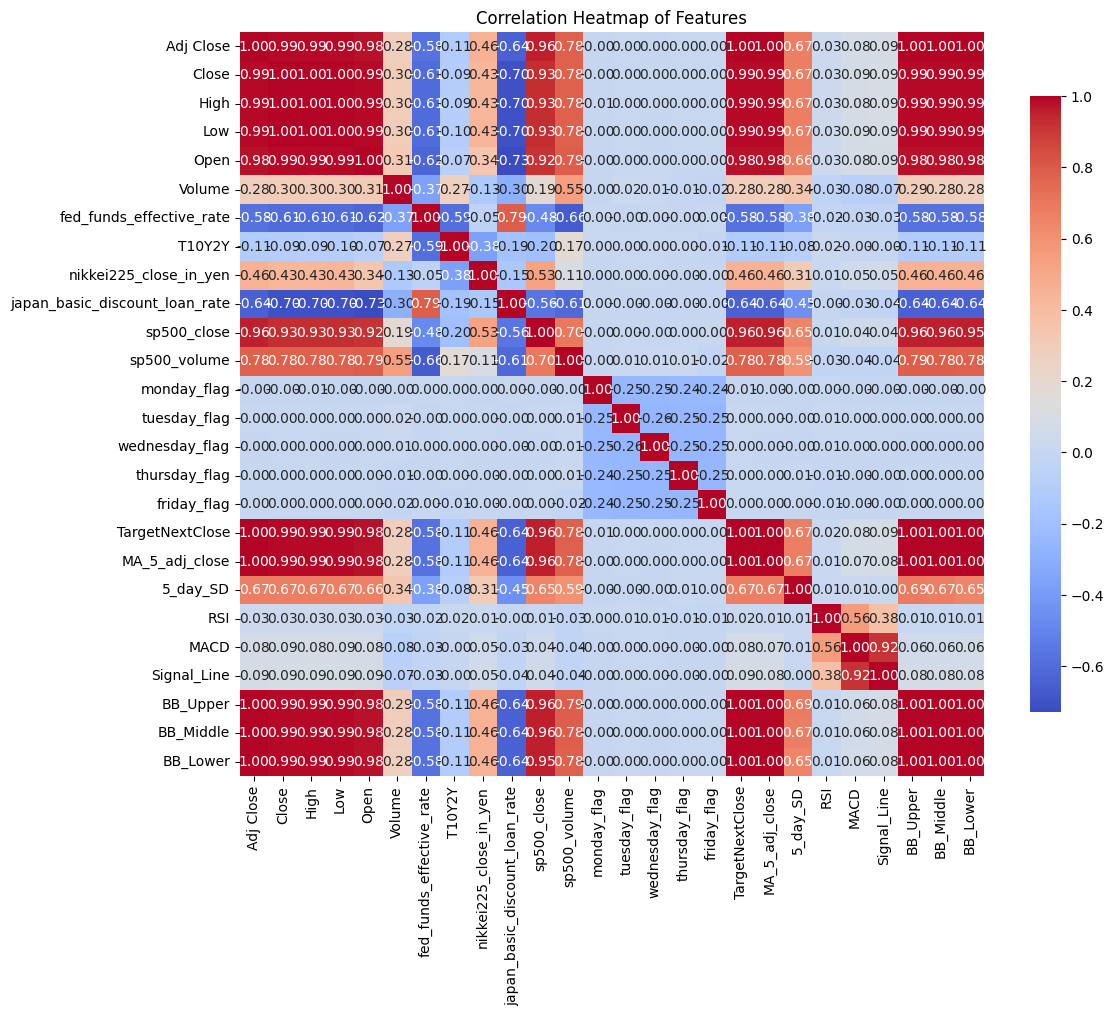

In [408]:
corr2 = df.corr()
corr2
plt.figure(figsize=(12, 10))
sns.heatmap(corr2, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

In [409]:
! pip install statsforecast


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [410]:
from statsforecast import StatsForecast
from sklearn.metrics import root_mean_squared_error

In [411]:
df_long = df.copy()
df_long.reset_index(inplace=True)
df_long['unique_id'] = "Toyota"
df_long = df_long.rename(columns={"Date": "ds", "TargetNextClose": "y"})
df_long = df_long[["ds", "unique_id", "y"]]

print(df_long.head())


          ds unique_id         y
0 1980-03-17    Toyota       NaN
1 1980-03-18    Toyota  2.296798
2 1980-03-19    Toyota  2.306134
3 1980-03-20    Toyota  2.306134
4 1980-03-21    Toyota  2.306134


In [412]:
df_long.shape

(11291, 3)

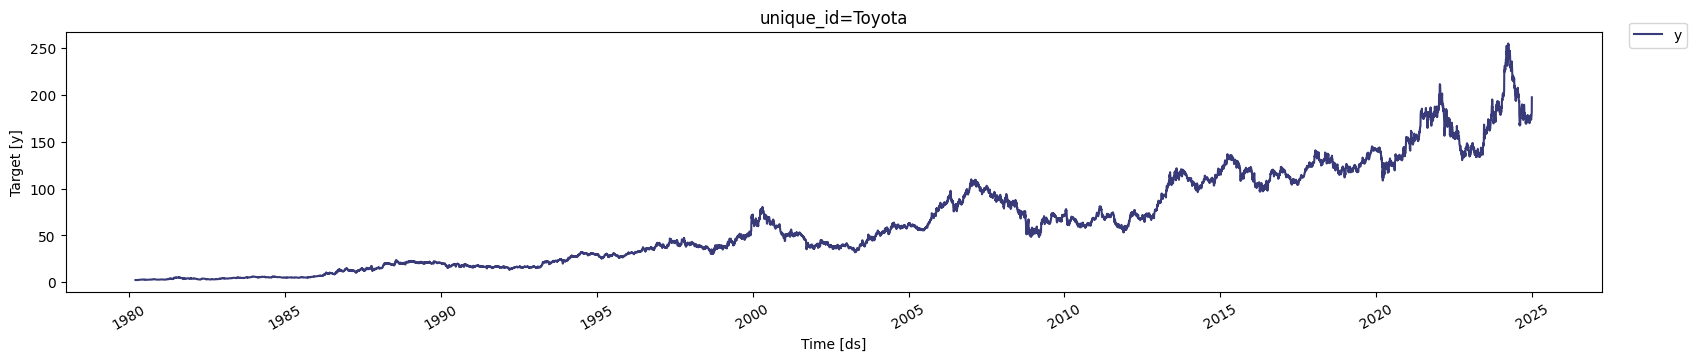

In [413]:
StatsForecast.plot(df_long)

In [421]:
df_long['ds'] = pd.to_datetime(df_long['ds'], format='%Y-%m')
split_date = '2016-01-01'
df_long['split'] = np.where(df_long.ds < split_date, 'train', 'test')
df_long['unique_id'] = 0
train_data = df_long[df_long['split']=='train'].drop('split', axis=1).copy()
test_data = df_long[df_long['split']=='test'].drop('split', axis=1).copy()
df_long = df_long.dropna()
df_long

,ds,unique_id,y,split
1,1980-03-18,0,2.296798,train
2,1980-03-19,0,2.306134,train
3,1980-03-20,0,2.306134,train
4,1980-03-21,0,2.306134,train
5,1980-03-24,0,2.362154,train
...,...,...,...,...
11286,2024-12-20,0,174.210007,test
11287,2024-12-23,0,178.169998,test
11288,2024-12-24,0,180.449997,test
11289,2024-12-26,0,181.429993,test


In [422]:
df_long.describe()

,ds,unique_id,y
count,11290,11290.0,11290.000000
mean,2002-07-29 10:10:26.253321472,0.0,63.574235
min,1980-03-18 00:00:00,0.0,2.259452
25%,1991-05-16 06:00:00,0.0,19.224636
50%,2002-07-25 12:00:00,0.0,50.580730
75%,2013-10-09 18:00:00,0.0,104.679998
max,2024-12-27 00:00:00,0.0,254.770004
std,NaN,0.0,52.258880


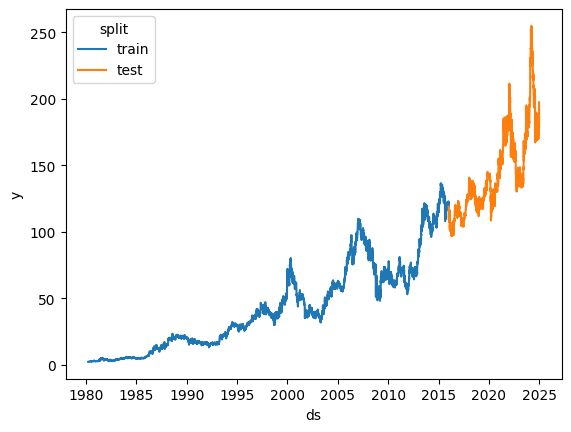

In [423]:
sns.lineplot(df_long, x='ds', y='y', hue='split')
plt.show()

In [424]:
from statsforecast.models import (
    HoltWinters,
    GARCH, 
    AutoARIMA,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

In [425]:
models = [
    HoltWinters(),
    GARCH(),
    AutoARIMA(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]

In [426]:
sf = StatsForecast( 
    models=models,
    freq='D', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)

In [427]:
forecasts_df = sf.forecast(df=train_data, h=48, level=[90])

forecasts_df.head()

,unique_id,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,"GARCH(1,1)","GARCH(1,1)-lo-90","GARCH(1,1)-hi-90",AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
0,0,2016-01-01,120.506928,116.941881,124.071974,77.313453,-3649.010850,3803.637756,119.074135,117.645516,120.502755,119.743187,113.660440,125.825934,43.273491,-11.509414,98.056396,119.096013,117.798113,120.733070
1,0,2016-01-02,121.406014,117.840967,124.971060,-24.194135,-2596.901465,2548.513196,119.221564,117.216776,121.226353,120.236244,114.153498,126.318991,43.273491,-11.509414,98.056396,118.934505,116.975473,120.980436
2,0,2016-01-03,122.923843,119.358797,126.488890,-16.173972,-1558.621093,1526.273149,119.252432,116.827435,121.677430,120.284569,114.201822,126.367315,43.273491,-11.509414,98.056396,119.103384,116.259466,121.528046
3,0,2016-01-04,121.589699,118.024653,125.154745,-29.537808,-1276.087938,1217.012321,119.219745,116.435980,122.003509,121.734718,115.651972,127.817465,43.273491,-11.509414,98.056396,119.061011,116.184946,121.536093
4,0,2016-01-05,120.332909,116.767862,123.897955,23.946154,-1235.435471,1283.327778,119.390706,116.301043,122.480370,121.560699,115.477953,127.643446,43.273491,-11.509414,98.056396,119.144897,116.182905,122.140474


In [428]:
sf.fit(df=train_data,
       id_col='unique_id',
       time_col='ds',
       target_col='y',
       )

y_pred_all = sf.predict(h=len(test_data))

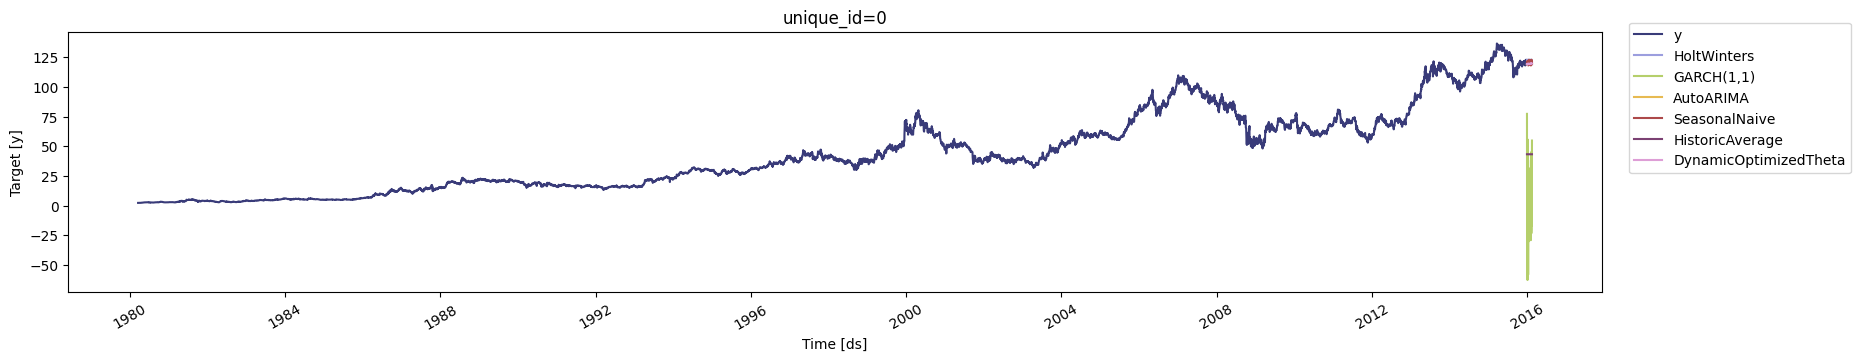

In [429]:
sf.plot(train_data,forecasts_df)

In [ ]:
y_pred_all

,unique_id,ds,HoltWinters,"GARCH(1,1)",AutoARIMA,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
0,0,2016-01-01,120.506928,77.313453,119.074135,119.743187,43.273491,119.096013
1,0,2016-01-02,121.406014,-24.194135,119.221564,120.236244,43.273491,118.934505
2,0,2016-01-03,122.923843,-16.173972,119.252432,120.284569,43.273491,119.103384
3,0,2016-01-04,121.589699,-29.537808,119.219745,121.734718,43.273491,119.061011
4,0,2016-01-05,120.332909,23.946154,119.390706,121.560699,43.273491,119.144897
...,...,...,...,...,...,...,...,...
2257,0,2022-03-07,121.589699,-41.575214,148.558579,120.236244,43.273491,147.915917
2258,0,2022-03-08,120.332909,45.893539,148.571595,120.284569,43.273491,148.125082
2259,0,2022-03-09,120.613274,33.866828,148.584611,121.734718,43.273491,148.071518
2260,0,2022-03-10,119.124458,14.995541,148.597627,121.560699,43.273491,148.174976


In [430]:
comp_df = pd.merge(
    test_data,
    y_pred_all,
    on=['unique_id', 'ds'],
    how='left'
)
comp_df.head()

,ds,unique_id,y,HoltWinters,"GARCH(1,1)",AutoARIMA,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
0,2016-01-04,0,118.950440,121.589699,-29.537808,119.219745,121.734718,43.273491,119.061011
1,2016-01-05,0,117.422958,120.332909,23.946154,119.390706,121.560699,43.273491,119.144897
2,2016-01-06,0,117.113594,120.613274,-62.705115,119.331390,120.574608,43.273491,119.085284
3,2016-01-07,0,114.445328,119.124458,55.734098,119.384506,121.715385,43.273491,119.056804
4,2016-01-08,0,111.728729,120.506928,-24.290746,119.472935,120.990311,43.273491,119.243927


In [431]:
y_true = test_data['y']
y_pred_hw = y_pred_all['HoltWinters']
y_pred_aa = y_pred_all['AutoARIMA']
y_pred_g = y_pred_all['GARCH(1,1)']
y_pred_sn = y_pred_all['SeasonalNaive']
y_pred_ha = y_pred_all['HistoricAverage']
y_pred_dot = y_pred_all['DynamicOptimizedTheta']

print(f"Holt Winters RMSE: {root_mean_squared_error(y_true, y_pred_hw)}")
print(f"AutoARIMA RMSE: {root_mean_squared_error(y_true, y_pred_aa)}")
print(f"GARCH RMSE: {root_mean_squared_error(y_true, y_pred_g)}")
print(f"Seasonal Naive RMSE: {root_mean_squared_error(y_true, y_pred_sn)}")
print(f"Historic Average RMSE: {root_mean_squared_error(y_true, y_pred_ha)}")
print(f"Dynamic Optimized Theta RMSE: {root_mean_squared_error(y_true, y_pred_dot)}")

Holt Winters RMSE: 39.433694715148235
AutoARIMA RMSE: 27.18438959437986
GARCH RMSE: 149.84862739813371
Seasonal Naive RMSE: 39.703497984509404
Historic Average RMSE: 106.11447377374195
Dynamic Optimized Theta RMSE: 27.40136333194044


XGBoost Model

In [432]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

In [433]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,...,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,...,0,2.296798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,...,0,2.306134,2.315471,0.026408,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
df = df.ffill()
df = df.dropna()

In [435]:
df.shape

(11271, 26)

In [436]:
X = df.drop(columns='TargetNextClose')
y = df['TargetNextClose']
tcsv = TimeSeriesSplit(n_splits=5)

In [437]:
param_grid = {
        'max_depth': np.arange(2,4).tolist(),
        'min_child_weight': np.arange(30,40,5).tolist(),
        'early_stopping_rounds': np.arange(60,80,5).tolist()
    }

grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', 
                                                  random_state=42, 
                                                  alpha=.01,
                                                  n_jobs=-1,
                                                  n_estimators=800,
                                                  eta = .01),
                               param_grid=param_grid,
                               cv=tcsv,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)

In [438]:
rmse_train_list = []
rmse_test_list = []

for train_index, test_index in tcsv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    grid_search.fit(
                    X_train, y_train,
                    eval_set=[(X_test, y_test)],
                    verbose=False
    )
    
    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)

    print(rmse_train,rmse_test)

print(f"RMSE train: {np.mean(rmse_train_list)}")
print(f"RMSE Test: {np.mean(rmse_test_list)}")

0.09260634237246804 7.0859630347936
0.16476665191622647 15.734774070111275
0.35797374946216415 9.999555059129118
0.4893606777332238 9.782348120369543
0.5834216644702802 34.4139323427551
RMSE train: 0.33762581719087253
RMSE Test: 15.403314525431728


In [439]:
grid_search.best_estimator_

XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=60,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=30, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, ...)

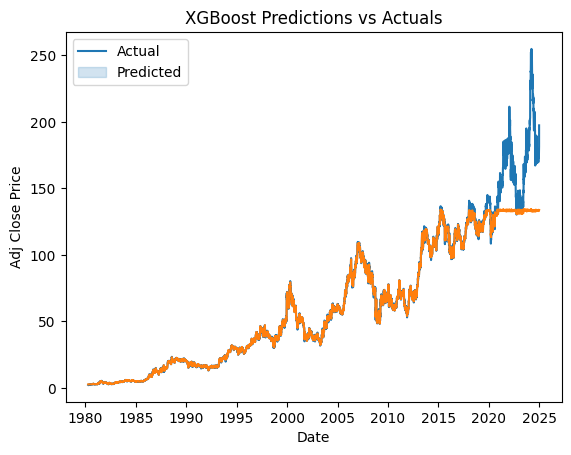

In [440]:
preds = best_model.predict(X)

sns.lineplot(data=X, x=df.index, y=y)
sns.lineplot(data=X, x=df.index, y=preds)
plt.title('XGBoost Predictions vs Actuals')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [442]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
comparison_df.head()

,Actual,Predicted
Date,,
2017-07-13,109.870003,109.036194
2017-07-14,109.839996,109.124474
2017-07-17,110.199997,110.268471
2017-07-18,110.330002,110.267952
2017-07-19,110.000000,110.267952


XGBoost with Differencing and scaling 

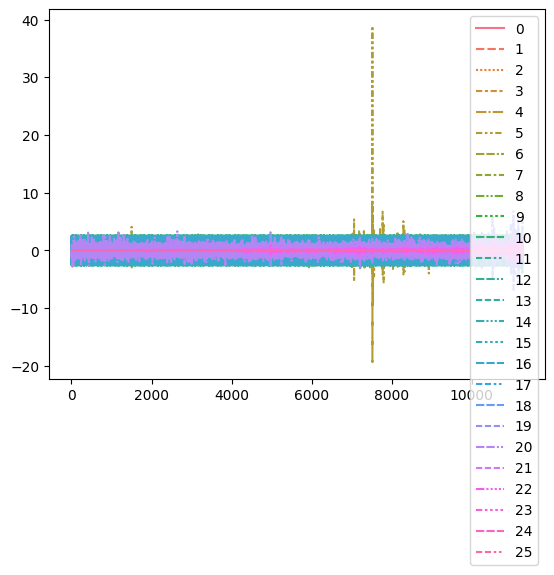

In [260]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))

df2 = scaled_df.diff()

sns.lineplot(df2)
plt.show()

In [261]:
df2 = df2.dropna()

In [262]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11270 entries, 1 to 11270
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11270 non-null  float64
 1   1       11270 non-null  float64
 2   2       11270 non-null  float64
 3   3       11270 non-null  float64
 4   4       11270 non-null  float64
 5   5       11270 non-null  float64
 6   6       11270 non-null  float64
 7   7       11270 non-null  float64
 8   8       11270 non-null  float64
 9   9       11270 non-null  float64
 10  10      11270 non-null  float64
 11  11      11270 non-null  float64
 12  12      11270 non-null  float64
 13  13      11270 non-null  float64
 14  14      11270 non-null  float64
 15  15      11270 non-null  float64
 16  16      11270 non-null  float64
 17  17      11270 non-null  float64
 18  18      11270 non-null  float64
 19  19      11270 non-null  float64
 20  20      11270 non-null  float64
 21  21      11270 non-null  float64
 22  22 

In [263]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

X = df2.drop(columns=17)
y = df2[17]
tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'max_depth': np.arange(2, 4).tolist(),
    'min_child_weight': np.arange(30, 40, 5).tolist(),
    'early_stopping_rounds': np.arange(60, 80, 5).tolist()
}

grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror',
                                                   random_state=42,
                                                   alpha=.01,
                                                   n_jobs=-1,
                                                   n_estimators=800,
                                                   eta=.01),
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

rmse_train_list = []
rmse_test_list = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_train,X_test))
    X_scaled = X_scaled.diff()

    grid_search.fit(X_train, y_train,
                    eval_set=[(X_test, y_test)],
                    verbose=False)

    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)

print(f"RMSE train: {np.mean(rmse_train_list)}")
print(f"RMSE Test: {np.mean(rmse_test_list)}")

y_test_pred_scaled_diff = best_model.predict(X_test)

RMSE train: 0.005900802911422536
RMSE Test: 0.015965607756991414


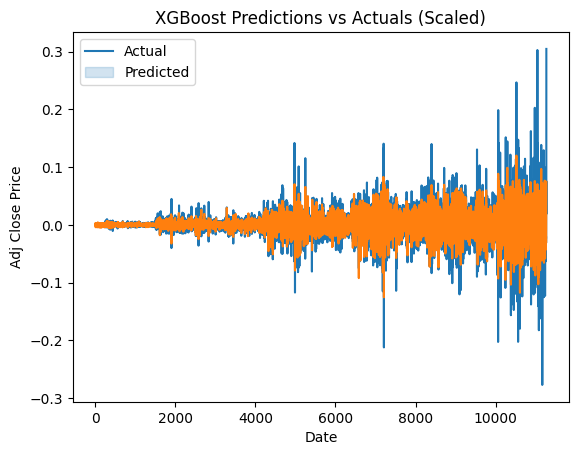

In [264]:
preds = best_model.predict(X)

sns.lineplot(data=X, x=df2.index, y=y)
sns.lineplot(data=X, x=df2.index, y=preds)
plt.title('XGBoost Predictions vs Actuals (Scaled)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend(['Actual', 'Predicted'])
plt.show()

RNN

In [339]:
df = pd.read_csv('Toyota_Data.csv', parse_dates=['Date'])
df = df[['Date','Close']]
df = df.set_index('Date')
df.head()

,Close
Date,
1980-03-17,3.291227
1980-03-18,3.304606
1980-03-19,3.304606
1980-03-20,3.304606
1980-03-21,3.384880


In [340]:
train = df.loc['1980-01-01':'2024-01-01']
valid = df.loc['2024-01-01':'2025-01-01']
test = df.loc['2025-01-01':]

In [341]:
valid

,Close
Date,
2024-01-02,181.369995
2024-01-03,181.550003
2024-01-04,182.970001
2024-01-05,187.070007
2024-01-08,187.889999
...,...
2024-12-20,178.169998
2024-12-23,180.449997
2024-12-24,181.429993


In [332]:
import tensorflow as tf

seq_length = 14
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    train.to_numpy(),
    targets=train[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    valid.to_numpy(),
    targets=valid[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

In [333]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[seq_length])
])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_root_mean_squared_error", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(train_ds, validation_data=valid_ds, epochs=500,
                    callbacks=[early_stopping_cb])

Epoch 1/500


c:\Users\sckay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0355 - root_mean_squared_error: 7.2780 - val_loss: 5.8839 - val_root_mean_squared_error: 8.1986
Epoch 2/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8850 - root_mean_squared_error: 3.4739 - val_loss: 4.8709 - val_root_mean_squared_error: 6.9064
Epoch 3/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3840 - root_mean_squared_error: 2.6937 - val_loss: 3.9944 - val_root_mean_squared_error: 5.9553
Epoch 4/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1837 - root_mean_squared_error: 2.4080 - val_loss: 3.5964 - val_root_mean_squared_error: 5.5004
Epoch 5/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5752 - root_mean_squared_error: 3.0296 - val_loss: 3.4173 - val_root_mean_squared_error: 5.3035
Epoch 6/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1092 - root_mean_squared_error: 2.2971 - val_loss: 3.5805 - val_root_mean_squared_error: 5.4318
Epoch 7/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [ ]:
model.evaluate(train_ds)

345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.4789 - root_mean_squared_error: 1.2646


[0.4856612980365753, 1.284684658050537]

In [ ]:
model.evaluate(valid_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2612 - root_mean_squared_error: 3.6356 


[2.0956156253814697, 3.464500665664673]

In [ ]:
tf.random.set_seed(42) 
deep_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

c:\Users\sckay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def fit_and_evaluate(model, train_set, valid_set, learning_rate, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_root_mean_squared_error", patience=50, restore_best_weights=True)
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    history = model.fit(train_set, validation_data=valid_set, epochs=epochs,
                        callbacks=[early_stopping_cb])
    valid_loss, valid_mae = model.evaluate(valid_set)
    return valid_mae

In [ ]:
fit_and_evaluate(deep_model, train_ds, valid_ds, learning_rate=0.01)

Epoch 1/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 49.3228 - root_mean_squared_error: 64.4415 - val_loss: 118.7305 - val_root_mean_squared_error: 122.0235
Epoch 2/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 14.8900 - root_mean_squared_error: 24.8388 - val_loss: 77.9931 - val_root_mean_squared_error: 82.6714
Epoch 3/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.2222 - root_mean_squared_error: 16.0169 - val_loss: 69.2791 - val_root_mean_squared_error: 74.4418
Epoch 4/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.3497 - root_mean_squared_error: 14.1889 - val_loss: 71.7389 - val_root_mean_squared_error: 76.6680
Epoch 5/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.8419 - root_mean_squared_error: 13.3716 - val_loss: 66.0431 - val_root_mean_squared_error: 71.4269
Epoch 6/500
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.4198 - root_mean_squared_error: 12.4041 - val_loss: 47.2062 - val_root_mean_squared_error: 54.2962
Epoch 7/500
345/345 ━━━━

33.720703125

In [ ]:
deep_model.evaluate(train_ds)

345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3842 - root_mean_squared_error: 5.6901


[3.4144649505615234, 5.732439041137695]

In [ ]:
deep_model.evaluate(valid_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.0274 - root_mean_squared_error: 41.9623 


[24.973772048950195, 33.720703125]

In [ ]:
import numpy as np

X = valid.to_numpy()[np.newaxis, :seq_length, np.newaxis]

ahead = 14

for step_ahead in range(ahead):
    y_pred_one = deep_model.predict(X, verbose=False)
    X = np.concatenate([X, y_pred_one.reshape(1, 1, 1, 1)], axis=1)

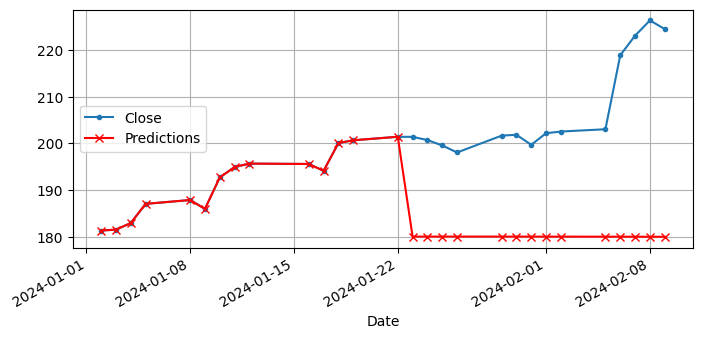

In [ ]:
Y_pred = pd.Series(X[0, :, 0].flatten(),
                   index=valid.iloc[:seq_length+ahead].index)

fig, ax = plt.subplots(figsize=(8, 3.5))
valid.iloc[:seq_length+ahead].plot(
    label="True", marker=".", ax=ax)
(Y_pred).plot(
    label="Predictions", grid=True, marker="x", color="r", ax=ax)
plt.legend(loc="center left")
plt.show()